# Walmart Sales Exploratory Data Analysis

## 1) Importing the necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## 2) Loading the dataset

In [2]:
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 3) Exploring the dataframe

### a) Determine the shape of the dataframe

In [3]:
rows = df.shape[0]
columns =df.shape[1]

print("This dataset has",rows,"rows and",columns,"columns.")

This dataset has 6435 rows and 8 columns.


### b) Check the summary of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### Observations:

1. The data type of the values in the Date column is an string. We will convert them into a datetime data type.
2. The data type of the values in the Store column is an integer. We will convert them into a string data type.
3. The data type for the values in the Holiday_Flag column are integers. We will convert it into a categorical data type since the values are used for identification purposes.

## 4) Cleaning the data

### a) Handling missing values

In [5]:
# Getting the number of missing data points per column
missing_values = df.isnull().sum()

# Look at the number of missing data points in the first tn columns
missing_values[0:10]

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

**There are no missing data points in this data set.**

### b) Converting incorrect data types

In [6]:
# Converting the data values of the "Date" column from string to datetime64.
df.Date =  pd.to_datetime(df.Date, format="%d-%m-%Y")

# Converting the data values of the "Store" column from integer to string.
df.Store = df.Store.apply(str)

#Converting the data value of the "Holiday_Flag" columns from integer to category
df.Holiday_Flag = pd.Categorical(df.Holiday_Flag)

# Rechecking the data type if they were changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(5), object(1)
memory usage: 358.4+ KB


**The data types of the values in the "Date", "Store", and "Holiday_Flag" columns were changed.**

### c) Add three columns for the month, week number and year

In [7]:
# Adding a column for the month
df['Month'] = df['Date'].dt.month

# Adding a column for week number
df['Week_number'] = df['Date'].dt.isocalendar().week

# Adding a column for the year
df['Year'] = df['Date'].dt.year

# Checking the dataset if changes were applied
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   category      
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Month         6435 non-null   int64         
 9   Week_number   6435 non-null   UInt32        
 10  Year          6435 non-null   int64         
dtypes: UInt32(1), category(1), datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 490.4+ KB


## 4) Data Analysis

### a) Who are the top 5 best performing Walmart store branches in terms of total sales?

In [8]:
# Grouping the dataset by store number then aggregating the total sales per store branch
sales_per_branch = df.groupby('Store')['Weekly_Sales'].sum()

# Converting the series into dataframe and sort the weekly sales per branch
sales_per_branch = sales_per_branch.to_frame().sort_values(by='Weekly_Sales', ascending=False)

sales_per_branch = sales_per_branch.reset_index()

# Created a new column that will show the value of weekly sales in million USD
sales_per_branch['Total_Sales (in mln. USD)'] = sales_per_branch['Weekly_Sales']/1e06

# Dropping the "Weekly_Sales" column and get the top 5 branches in terms of total sales
top_5_best = sales_per_branch.drop(columns=['Weekly_Sales']).head()
top_5_best

,Store,Total_Sales (in mln. USD)
0,20,301.397792
1,4,299.543953
2,14,288.999911
3,13,286.517704
4,2,275.382441


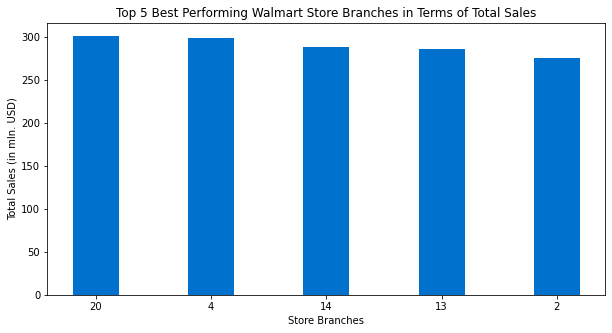

In [9]:
# Creating a bar graph
store = top_5_best['Store']
total_sales = top_5_best['Total_Sales (in mln. USD)']

fig = plt.figure(figsize = (10,5)) 
plt.bar(store, total_sales, color = '#0072ce', width = 0.4)
plt.xlabel("Store Branches")
plt.ylabel("Total Sales (in mln. USD)")
plt.title("Top 5 Best Performing Walmart Store Branches in Terms of Total Sales")
plt.show()

**Store Branch Nos. 20, 4, 14, 13, and 2 are the top 5 best performing Walmart store branches in terms of total sales.**

### b) Who are the top 5 worst performing Walmart store branches in terms of total sales?

In [10]:
# Creating a dataset showing only the last 5 rows from the sales_per_branch
top_5_worst = sales_per_branch.drop(columns=['Weekly_Sales']).tail()
top_5_worst

,Store,Total_Sales (in mln. USD)
40,38,55.159626
41,36,53.412215
42,5,45.475689
43,44,43.293088
44,33,37.160222


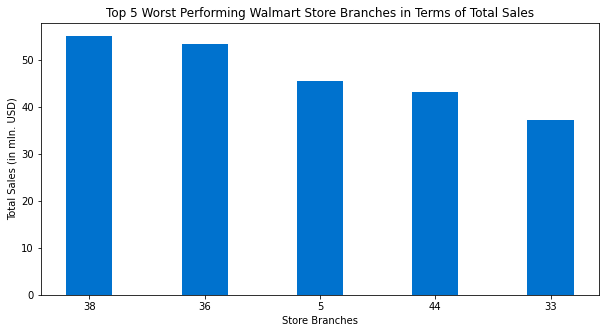

In [11]:
# Creating a bar graph
store = top_5_worst['Store']
total_sales = top_5_worst['Total_Sales (in mln. USD)']

fig = plt.figure(figsize = (10,5)) 
plt.bar(store, total_sales, color = '#0072ce', width = 0.4)
plt.xlabel("Store Branches")
plt.ylabel("Total Sales (in mln. USD)")
plt.title("Top 5 Worst Performing Walmart Store Branches in Terms of Total Sales")
plt.show()


**Store Branch Nos. 38, 36, 5, 44, and 33 are the top 5 worst performing Walmart store branches in terms of sales.**

### c) What is the correlation between the store branches' total sales and their mean temperature

In [12]:
# Creating a new dataset consisting the store branch number, the total sales, and the mean temperature

sales_vs_temp = sales_per_branch.drop(columns=['Weekly_Sales'])
sales_vs_temp['Store'] = sales_vs_temp['Store'].astype('int64')
sales_vs_temp = sales_vs_temp.sort_values(by='Store', ascending=True).reset_index()
sales_vs_temp = sales_vs_temp.drop(columns=['index'])

temp = df.groupby('Store')['Temperature'].mean()
temp = temp.to_frame().reset_index()
temp['Store'] = temp['Store'].astype('int64')
temp = temp.sort_values(by='Store', ascending=True).reset_index()
temp = temp.drop(columns=['index'])

sales_vs_temp['Mean Temperature'] = temp['Temperature']
sales_vs_temp.head()

,Store,Total_Sales (in mln. USD),Mean Temperature
0,1,222.402809,68.306783
1,2,275.382441,68.216364
2,3,57.586735,71.434196
3,4,299.543953,62.253357
4,5,45.475689,69.410140


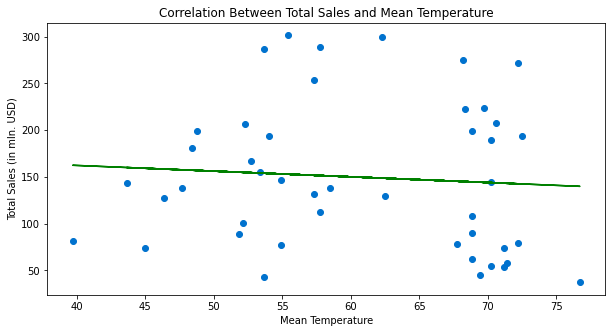

In [13]:
# Creating a scatterplot
temp = sales_vs_temp['Mean Temperature']
total_sales = sales_vs_temp['Total_Sales (in mln. USD)']

fig = plt.figure(figsize = (10,5)) 
plt.scatter(temp, total_sales, c= '#0072ce' )

z = np.polyfit(temp, total_sales, 1)
p = np.poly1d(z)
plt.plot(temp, p(temp),"g")

plt.xlabel("Mean Temperature")
plt.ylabel("Total Sales (in mln. USD)")
plt.title("Correlation Between Total Sales and Mean Temperature")
plt.show()

In [14]:
# Determining the Pearson coefficient ratio

stats.pearsonr(temp, total_sales)

(-0.07638774908646388, 0.6179663423198986)

**There is a negligible correlation between the the store branches' total sales and their mean temperatures.**

### d) What is the correlation between the store branches' mean weekly sales and the mean fuel price

In [15]:
# Creating a new dataset which consists of the store branch number, mean weekly sale, and mean fuel price

df_2 = df.copy()
df_2['Store'] = df_2['Store'].astype('int64')
msales_vs_mfuel = df_2.groupby('Store')['Weekly_Sales','Fuel_Price'].mean()
msales_vs_mfuel.head()

<ipython-input-15-d9945e35785a>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  msales_vs_mfuel = df_2.groupby('Store')['Weekly_Sales','Fuel_Price'].mean()


,Weekly_Sales,Fuel_Price
Store,,
1,1.555264e+06,3.219699
2,1.925751e+06,3.219699
3,4.027044e+05,3.219699
4,2.094713e+06,3.216972
5,3.180118e+05,3.219699


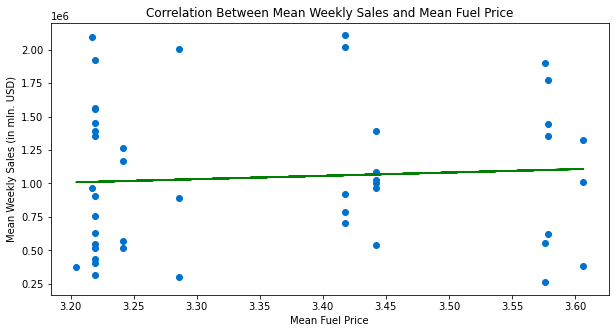

In [16]:
# Creating a scatterplot
mfuel = msales_vs_mfuel['Fuel_Price']
msales = msales_vs_mfuel['Weekly_Sales']

fig = plt.figure(figsize = (10,5)) 
plt.scatter(mfuel, msales, c= '#0072ce' )

z = np.polyfit(mfuel, msales, 1)
p = np.poly1d(z)
plt.plot(mfuel, p(mfuel),"g")

plt.xlabel("Mean Fuel Price")
plt.ylabel("Mean Weekly Sales (in mln. USD)")
plt.title("Correlation Between Mean Weekly Sales and Mean Fuel Price")
plt.show()

In [17]:
# Determining the Pearson coefficient ratio

stats.pearsonr(mfuel, msales)

(0.06773422508957701, 0.6584189067151794)

**There is a negligible correlation between the the store branches' mean weekly sales and the mean fuel price.**

### e) What is the correlation between the store branches' mean weekly sales and the mean consumer price index(CPI)?

In [18]:
# Creating a dataset that consist of the store branch number, the mean weekly sales, and the mean consumer price index(CPI)

msales_vs_mcpi = df_2.groupby('Store')['Weekly_Sales', 'CPI'].mean()
msales_vs_mcpi.head()

<ipython-input-18-4c0de69932ef>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  msales_vs_mcpi = df_2.groupby('Store')['Weekly_Sales', 'CPI'].mean()


,Weekly_Sales,CPI
Store,,
1,1.555264e+06,215.996892
2,1.925751e+06,215.646311
3,4.027044e+05,219.391531
4,2.094713e+06,128.679669
5,3.180118e+05,216.565581


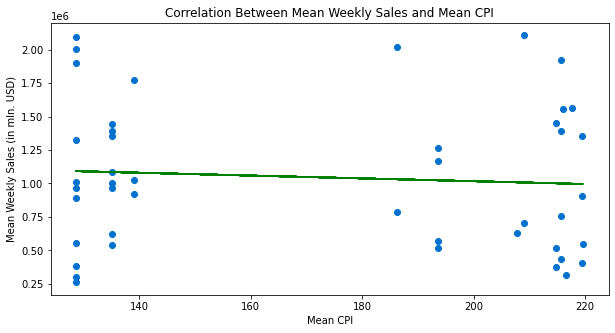

In [19]:
# Creating a scatterplot

mcpi = msales_vs_mcpi['CPI']
msales = msales_vs_mcpi['Weekly_Sales']

fig = plt.figure(figsize = (10,5)) 
plt.scatter(mcpi, msales, c= '#0072ce' )

z = np.polyfit(mcpi, msales, 1)
p = np.poly1d(z)
plt.plot(mcpi, p(mcpi),"g")

plt.xlabel("Mean CPI")
plt.ylabel("Mean Weekly Sales (in mln. USD)")
plt.title("Correlation Between Mean Weekly Sales and Mean CPI")
plt.show()

In [20]:
#Determining the Pearson correlation coefficient

stats.pearsonr(mcpi, msales)

(-0.07656886071136423, 0.6171309899200206)

**There is a negligible correlation between the the store branches' mean weekly sales and the mean consumer price index(CPI).**

### f) What is the correlation between the store branches' mean weekly sales and the mean unemployment?

In [56]:
# Creating a dataset that consist of the store branch number, the mean weekly sales, and the mean unemployment rate

msales_vs_munem = df_2.groupby('Store')['Weekly_Sales', 'Unemployment'].mean()
msales_vs_munem.tail()

<ipython-input-56-22c771a4d5a8>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  msales_vs_munem = df_2.groupby('Store')['Weekly_Sales', 'Unemployment'].mean()


,Weekly_Sales,Unemployment
Store,,
41,1.268125e+06,6.973378
42,5.564039e+05,8.362965
43,6.333247e+05,9.934804
44,3.027489e+05,6.735622
45,7.859814e+05,8.648748


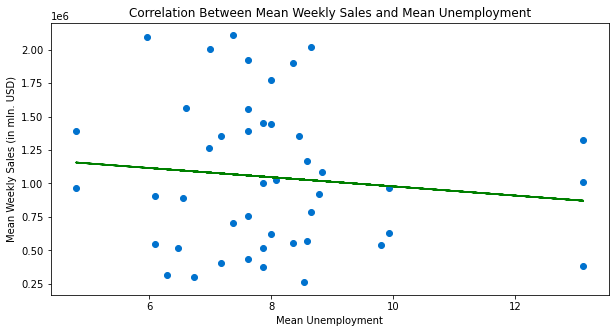

In [22]:
# Creating a scatterplot

munem = msales_vs_munem['Unemployment']
msales = msales_vs_munem['Weekly_Sales']

fig = plt.figure(figsize = (10,5)) 
plt.scatter(munem, msales, c= '#0072ce' )

z = np.polyfit(munem, msales, 1)
p = np.poly1d(z)
plt.plot(munem, p(munem),"g")

plt.xlabel("Mean Unemployment")
plt.ylabel("Mean Weekly Sales (in mln. USD)")
plt.title("Correlation Between Mean Weekly Sales and Mean Unemployment")
plt.show()

In [23]:
#Determining the Pearson correlation coefficient

stats.pearsonr(munem, msales)

(-0.11228079769921515, 0.46274512845722804)

**There is a negligible relationship between the store branches' mean weekly sales and the mean unemployment rate.**

### g) What is the distribution of the total sales?

<AxesSubplot:xlabel='Total_Sales (in mln. USD)', ylabel='Count'>

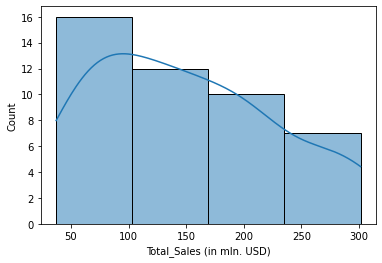

In [24]:
sns.histplot(sales_per_branch['Total_Sales (in mln. USD)'], bins=4, kde=True)

**The distribution of the total sales is positively skewed with most of the store branches earn between 37 to 103 million USD.**

### h) What is the distribution of the mean temperatures of the locations where the stores are built?

In [25]:
sales_vs_temp.sort_values(by='Mean Temperature', ascending=False)

,Store,Total_Sales (in mln. USD),Mean Temperature
32,33,37.160222,76.728182
10,11,193.962787,72.480769
41,42,79.565752,72.241189
9,10,271.617714,72.241189
2,3,57.586735,71.434196
35,36,53.412215,71.160350
36,37,74.202740,71.160350
38,39,207.445542,70.597343
37,38,55.159626,70.262797
27,28,189.263681,70.262797


<AxesSubplot:xlabel='Mean Temperature', ylabel='Count'>

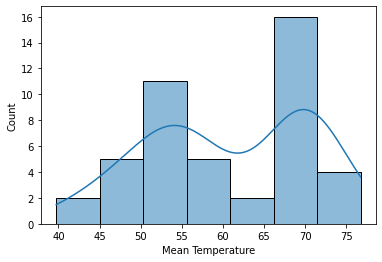

In [26]:
sns.histplot(sales_vs_temp['Mean Temperature'], bins=7, kde=True)

**The distribution of the mean temperatures is bimodal distribution. The first peak comes from a group of store branches located at areas where temperatures are between 50.58 and 55.56. The second comes from a group of store branches located at areas where temperatures are between 66.16 and 71.44.**

### i) What is the distribution of the mean unemployment rate of the locations where the stores are built?

<AxesSubplot:xlabel='Unemployment', ylabel='Count'>

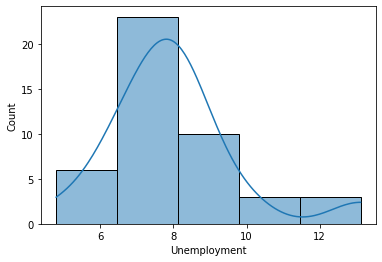

In [55]:
sns.histplot(msales_vs_munem['Unemployment'], bins=5, kde=True)

**The graph shows a right-skewed distribution of the mean unemployment rate with most of the store branches located in places where the mean unemployment rate is between 6.4 and 8.1 percent.**